In [1]:
import yaeos
from yaeos import PengRobinson76, QMR
import numpy as np

In [2]:
# Number of components, for easier definition
nc = 2

# kij and lij matrices
k12 = 0.1
lij = kij = np.zeros((nc,nc))
kij[0,1] = kij[1,0] = k12

mixrule = QMR(kij, lij)

# Critical constants
Tc = [320, 375]
Pc = [30, 45]
w = [0.0123, 0.045]

model = PengRobinson76(Tc, Pc, w, mixrule)
n = [1.0, 0.2]

model.fugacity(n, v=2.0, t=303.15, dn=True)

{'ln_phi': array([2.3118468 , 2.33292475]),
 'dt': None,
 'dp': None,
 'dn': array([[-0.00186921,  0.00934604],
        [ 0.00934604, -0.04673019]])}

In [3]:
n = [0.4, 0.6]
Tc = [190.564, 425.12]
Pc = [45.99, 37.96]
w = [0.0115478, 0.200164]

lij = kij = np.zeros((nc,nc))
mixrule = QMR(kij, lij)
model = PengRobinson76(Tc, Pc, w, mixrule)

In [4]:
%%time
P, T = 60.0, 294.0

ts = np.linspace(200, 400, 50)
ps = np.linspace(30, 100, 50)
betas = []

t = []
p = []

for T in ts:
    for P in ps:
        x, y, P, T, Vx, Vy, beta = yaeos.yaeos_c.flash(id=model.id, z=n, p=P, t=T)
        t.append(T)
        p.append(P)
        betas.append(beta)

CPU times: user 1.23 s, sys: 12.9 ms, total: 1.24 s
Wall time: 1.24 s


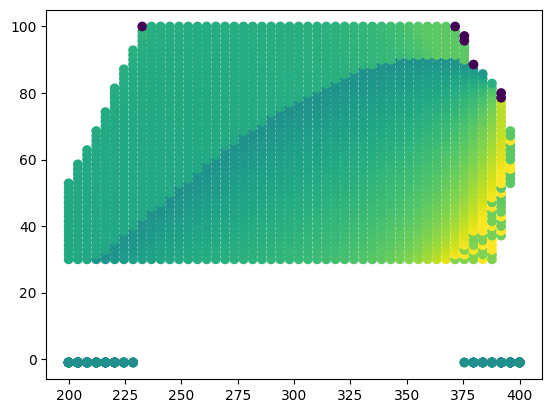

In [5]:
import matplotlib.pyplot as plt
plt.scatter(t, p, c=betas)

## Modified Huron-Vidal MixingRule

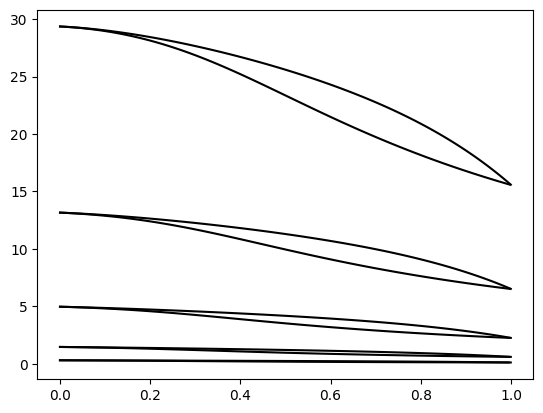

In [32]:
from yaeos import NRTL, MHV, PengRobinson76

a = b = c = np.zeros((nc,nc))

tc = [647.14, 513.92]
pc = [220.64, 61.48]
w =  [0.344, 0.649]

a[0, 1] = 3.458
a[1, 0] = -0.801

b[0, 1] = -586.1
b[1, 0] = 246.2

c[0, 1] = 0.3
c[1, 0] = 0.3

ge_model = NRTL(a, b, c)
mixrule = MHV(ge_model, q=-0.53)
model = PengRobinson76(tc, pc, w, mixrule)


colors = ["red", "green", "blue", "orange", "black"]

for i, T in enumerate(np.linspace(50+273, 200+273, 5)):
    i=4
    xs = np.linspace(0.001, 0.999, 100)
    ys = []
    ps = []

    for x1 in xs:
        x = [x1, 1-x1]
        p, x, y, vx, vy, beta = yaeos.yaeos_c.saturation_pressure(model.id, x, T, "bubble")
        ps.append(p)
        ys.append(y[0])

    plt.plot(xs, ps, color=colors[i])
    plt.plot(ys, ps, color=colors[i])

In [ ]:
%